## Seaborn

[Seaborn](https://seaborn.pydata.org/) expande as funcionalidades da matplotlib (as diferenças são ilustradas [aqui](https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html)).

* [Make your Data Talk!](https://towardsdatascience.com/make-your-data-talk-13072f84eeac).
* [Intermediate Python for Data Science](https://www.datacamp.com/courses/intermediate-python-for-data-science) (Data Camp)
* [Python Seaborn Tutorial For Beginners](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial) (Data Camp)
* [PythonDataScienceHandbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)

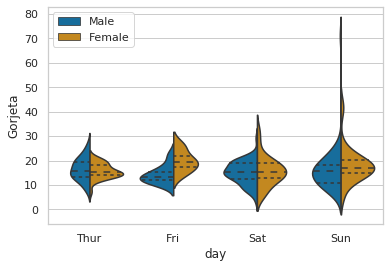

In [4]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips['Gorjeta'] = 100 * tips.tip / tips.total_bill

sns.set(style='whitegrid', palette='colorblind')
sns.violinplot(x='day', y='Gorjeta', hue='sex', split=True, inner='quart', data=tips)
plt.legend(loc='upper left')